In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import pearsonr

import time
from sklearn import preprocessing

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/VINTER'

from tqdm import tqdm
tqdm.pandas()
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/VINTER


In [ ]:
df = pd.read_csv ('application_train.csv')

In [ ]:
df['CODE_GENDER'].replace('XNA', np.nan, inplace=True)
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
df['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace=True)
df['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace=True)

In [ ]:
df['CODE_GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
df['CODE_GENDER'].replace('XNA',np.nan, inplace=True)
df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

In [ ]:
feature_df = df.drop(['TARGET'],axis=1)
target_df = df['TARGET']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 142 entries, SK_ID_CURR to external_sources_nanmedian
dtypes: float64(86), int64(40), object(16)
memory usage: 333.1+ MB


In [ ]:
df.sort_values('TARGET', ascending=False)['TARGET']

0         1
142676    1
71932     1
58253     1
142665    1
         ..
106858    0
106860    0
106861    0
106862    0
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [ ]:
feature_df.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,income_per_person,payment_rate,phone_to_birth_ratio,phone_to_employ_ratio,external_sources_weighted,external_sources_min,external_sources_max,external_sources_sum,external_sources_mean,external_sources_nanmedian
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,202500.0,0.060749,0.119860,1.780220,1.512423,0.083037,0.262949,0.485361,0.161787,0.139376
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,135000.0,0.027598,0.049389,0.696970,NaN,0.311267,0.622246,0.933513,0.466757,0.466757
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,67500.0,0.050000,0.042791,3.622222,NaN,0.555912,0.729567,1.285479,0.642739,0.642739


In [ ]:
print ("data types:\n", feature_df.dtypes)

data types:
 SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
external_sources_min          float64
external_sources_max          float64
external_sources_sum          float64
external_sources_mean         float64
external_sources_nanmedian    float64
Length: 141, dtype: object


In [ ]:
numerical = feature_df.select_dtypes(exclude=['object'])
col_names = numerical.columns

fig, ax = plt.subplots(len(col_names), figsize=(256,256))
fig.subplots_adjust(hspace=.5)

for i, col_val in enumerate(col_names):

    sns.distplot(numerical[col_val].dropna(), hist=True, ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

OverflowError: ignored

In [65]:
# Convert object type to category type
for col in feature_df.columns:
  if feature_df[col].dtypes == 'O':
    feature_df[col] = feature_df[col].astype('category')

# Convert float64/int64 to category type
convert = ['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in convert:
  feature_df[col] = feature_df[col].astype('category')
  
target_df = target_df.astype('category')

In [66]:
num_feature_df = feature_df.select_dtypes(exclude=['category'])
cat_feature_df = feature_df.select_dtypes(include=['category'])

In [67]:
df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

In [68]:
df['annuity_income_percentage'] = df['AMT_ANNUITY'] /df['AMT_INCOME_TOTAL']
df['car_to_birth_ratio'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
df['car_to_employ_ratio'] = df['OWN_CAR_AGE'] /df['DAYS_EMPLOYED']
df['children_ratio'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']
df['credit_to_annuity_ratio'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
df['credit_to_goods_ratio'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df['credit_to_income_ratio'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['days_employed_percentage'] = df['DAYS_EMPLOYED'] /df['DAYS_BIRTH']
df['income_credit_percentage'] = df['AMT_INCOME_TOTAL'] /df['AMT_CREDIT']
df['income_per_child'] = df['AMT_INCOME_TOTAL'] / (1 +df['CNT_CHILDREN'])
df['income_per_person'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df['payment_rate'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df['phone_to_birth_ratio'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
df['phone_to_employ_ratio'] =df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']

In [69]:
# External sources
df['external_sources_weighted'] = df.EXT_SOURCE_1 * 2 + df.EXT_SOURCE_2 * 3 + df.EXT_SOURCE_3 * 4
for function_name in ['min', 'max', 'sum', 'mean', 'nanmedian']:
    df['external_sources_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
        df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [70]:
engineered_numerical_columns = ['annuity_income_percentage',
                                'car_to_birth_ratio',
                                'car_to_employ_ratio',
                                'children_ratio',
                                'credit_to_annuity_ratio',
                                'credit_to_goods_ratio',
                                'credit_to_income_ratio',
                                'days_employed_percentage',
                                'income_credit_percentage',
                                'income_per_child',
                                'income_per_person',
                                'payment_rate',
                                'phone_to_birth_ratio',
                                'phone_to_employ_ratio',
                                'external_sources_weighted',
                                'external_sources_min',
                                'external_sources_max',
                                'external_sources_sum',
                                'external_sources_mean',
                                'external_sources_nanmedian']

In [71]:
df_eng = df[engineered_numerical_columns + ['TARGET']]
df_eng_corr = abs(df_eng.corr())

In [72]:
df_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                        1.000000
external_sources_weighted     0.236289
external_sources_mean         0.222052
external_sources_nanmedian    0.218118
external_sources_max          0.196876
external_sources_min          0.185266
external_sources_sum          0.173322
credit_to_goods_ratio         0.069427
days_employed_percentage      0.067955
car_to_birth_ratio            0.048824
credit_to_annuity_ratio       0.032102
phone_to_birth_ratio          0.029550
car_to_employ_ratio           0.029118
children_ratio                0.021223
annuity_income_percentage     0.014265
payment_rate                  0.012704
income_per_child              0.012529
credit_to_income_ratio        0.007727
income_per_person             0.006571
phone_to_employ_ratio         0.002506
income_credit_percentage      0.001817
Name: TARGET, dtype: float64

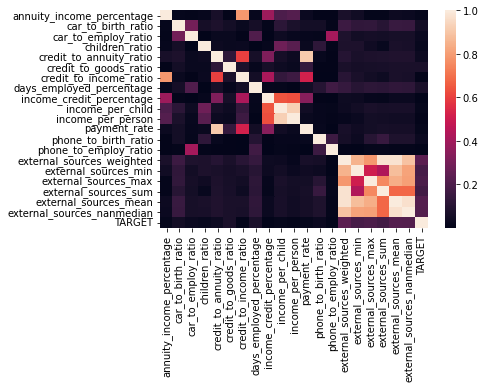

In [73]:
sns.heatmap(df_eng_corr, 
            xticklabels=df_eng_corr.columns,
            yticklabels=df_eng_corr.columns)

Layak:  282686
Tidak Layak:  24825


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


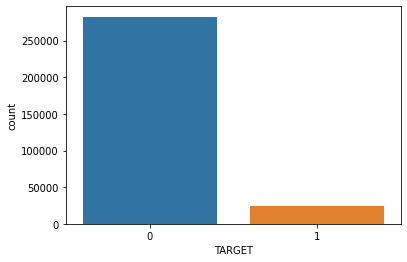

In [74]:
ax = sns.countplot(target_df, label="Count")
L, T = target_df.value_counts()
print("Layak: ", L)
print("Tidak Layak: ", T)
plt.show()

In [75]:
# Concat feature and target dataframe
data_df = pd.concat([feature_df,target_df], axis=1)

In [76]:
# Check total unique value
for col in cat_feature_df.columns:
  print(col,"= ",cat_feature_df[col].dropna().unique())
  print('\n')

SK_ID_CURR =  [100002, 100003, 100004, 100006, 100007, ..., 456251, 456252, 456253, 456254, 456255]
Length: 307511
Categories (307511, int64): [100002, 100003, 100004, 100006, ..., 456252, 456253, 456254, 456255]


NAME_CONTRACT_TYPE =  ['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans']


CODE_GENDER =  ['M', 'F']
Categories (2, object): ['F', 'M']


FLAG_OWN_CAR =  ['N', 'Y']
Categories (2, object): ['N', 'Y']


FLAG_OWN_REALTY =  ['Y', 'N']
Categories (2, object): ['N', 'Y']


CNT_CHILDREN =  [0, 1, 2, 3, 4, ..., 11, 12, 10, 19, 14]
Length: 15
Categories (15, int64): [0, 1, 2, 3, ..., 11, 12, 14, 19]


AMT_INCOME_TOTAL =  [202500.0, 270000.0, 67500.0, 135000.0, 121500.0, ..., 936000.0, 98356.5, 96768.0, 546250.5, 113062.5]
Length: 2548
Categories (2548, float64): [25650.0, 26100.0, 26460.0, 26550.0, ..., 9000000.0, 13500000.0,
                             18000090.0, 117000000.0]


AMT_CREDIT =  [406597.5, 1293502.5, 135000.0, 312682.5, 513000

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


FLAG_MOBIL =  [1, 0]
Categories (2, int64): [0, 1]


FLAG_EMP_PHONE =  [1, 0]
Categories (2, int64): [0, 1]


FLAG_WORK_PHONE =  [0, 1]
Categories (2, int64): [0, 1]


FLAG_CONT_MOBILE =  [1, 0]
Categories (2, int64): [0, 1]


FLAG_PHONE =  [1, 0]
Categories (2, int64): [0, 1]


FLAG_EMAIL =  [0, 1]
Categories (2, int64): [0, 1]


OCCUPATION_TYPE =  ['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers', ..., 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']
Length: 18
Categories (18, object): ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', ...,
                          'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff']


CNT_FAM_MEMBERS =  [1.0, 2.0, 3.0, 4.0, 5.0, ..., 12.0, 20.0, 15.0, 16.0, 11.0]
Length: 17
Categories (17, float64): [1.0, 2.0, 3.0, 4.0, ..., 14.0, 15.0, 16.0, 20.0]


REGION_RATING_CLIENT =  [2, 1, 3]
Categories (3, int64): [1, 2, 3]


REGION_RATING_CLIENT_W_CITY =  [2, 1, 3]
Categories (3, 